In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
# Load data
df = pd.read_csv("kbopitchingdata.csv")

columns_to_keep = [
    'ERA', 'WHIP', 'strikeouts', 'complete_game', 'shutouts', 'saves',
    'innings_pitched', 'hits', 'runs', 'earned_runs', 'home_runs', 'walks', 'win_loss_percentage'
]

df = df[columns_to_keep]
df

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
0,3.57,1.312,1062,0,18,32,1264.1,1117,557,501,79,542,0.558
1,3.67,1.316,1051,2,6,33,1255.0,1166,581,512,85,486,0.560
2,4.28,1.487,1037,2,10,27,1260.1,1288,653,599,104,586,0.519
3,4.29,1.450,1031,2,14,46,1250.0,1287,653,596,129,526,0.560
4,4.50,1.476,1046,3,10,33,1247.2,1256,686,624,122,585,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.19,1.260,318,32,4,10,725.1,625,318,257,41,289,0.700
319,3.51,1.298,394,19,8,15,708.1,660,350,276,52,259,0.582
320,3.95,1.435,363,26,4,4,713.2,763,385,313,69,261,0.388
321,3.76,1.403,348,24,2,3,707.9,698,388,296,50,295,0.475


In [21]:
# Replace "?" values with NaN so we can use dropna and drop NaN values
df.replace("?", np.nan, inplace = True)
df.dropna(inplace = True)

In [22]:
# X and Y axes
X = df.drop(columns = ['win_loss_percentage'])
Y = df['win_loss_percentage'].apply(lambda x: 1 if x >= 0.5 else 0)

In [23]:
# Initialize MinMaxScale and fit and transform the data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks
0,0.270341,0.314504,0.870461,0.000000,0.947368,0.591837,0.946872,0.511795,0.447761,0.462520,0.262821,0.734990
1,0.296588,0.320611,0.859666,0.035714,0.315789,0.612245,0.931811,0.562051,0.483582,0.480064,0.301282,0.619048
2,0.456693,0.581679,0.845927,0.035714,0.526316,0.489796,0.940252,0.687179,0.591045,0.618820,0.423077,0.826087
3,0.459318,0.525191,0.840039,0.035714,0.736842,0.877551,0.923535,0.686154,0.591045,0.614035,0.583333,0.701863
4,0.514436,0.564885,0.854760,0.053571,0.526316,0.612245,0.918901,0.654359,0.640299,0.658692,0.538462,0.824017


In [24]:
# Train and tests
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
Y_train.head()
Y_test.head()

173    0
132    0
197    1
9      0
104    1
Name: win_loss_percentage, dtype: int64

In [25]:
# Make CART model
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, Y_train)

# Predict the data
Y_pred = cart_model.predict(X_test)

Accuracy: 74.22680412371135


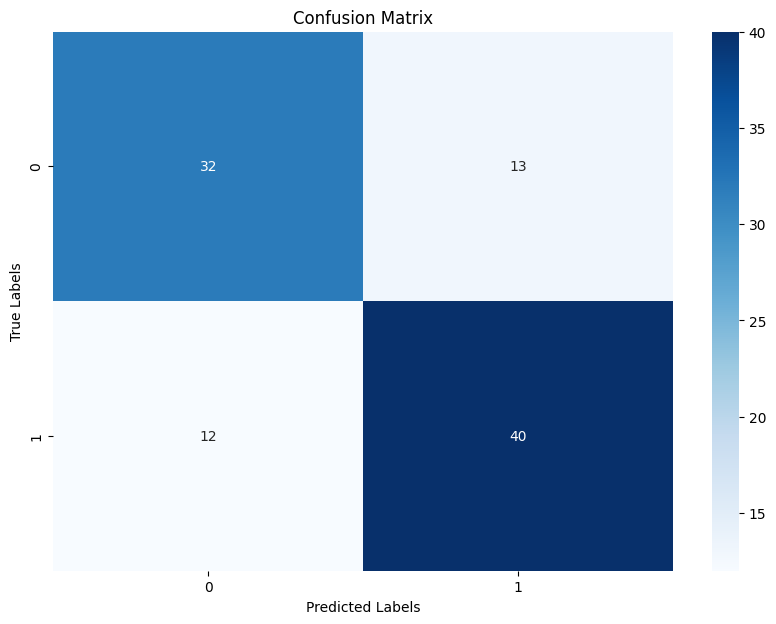

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        45
           1       0.75      0.77      0.76        52

    accuracy                           0.74        97
   macro avg       0.74      0.74      0.74        97
weighted avg       0.74      0.74      0.74        97



In [26]:
# Calculate accuracy score, confusion matrix, and classification report
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f'Accuracy: {accuracy}')

confusion_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

classification_report = classification_report(Y_test, Y_pred)
print("Classification Report: ")
print(classification_report)
